In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [80]:
stats = pd.read_csv("stats.csv")
print(f"\nWe will be analyzing the data of {stats.shape[0]} different pitchers")
print("\nBased this data, we will be predicting their salaries for 2018 Season")
stats.head()


We will be analyzing the data of 152 different pitchers

Based this data, we will be predicting their salaries for 2018 Season


,Player Name,Team Name,Wins,Losses,Saves,Hold,Blown Saves,Games,Games Started,Innings,...,HR/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,Salary(2018),Salary(2017)
0,Merrill Kelly,Wyverns,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,Henry Sosa,Twins,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,Hyun-Jong Yang,Tigers,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,Woo-Chan Cha,Twins,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,Brooks Raley,Giants,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [81]:
#The money value follows the following rule
# 1 = $10 -> 2700 = $27000
# The statistics are from a Korean website, so the US Dollar Conversion can be done by adding a single zero at the end.
stats["Salary(2018)"].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: Salary(2018), dtype: float64

<Axes: >

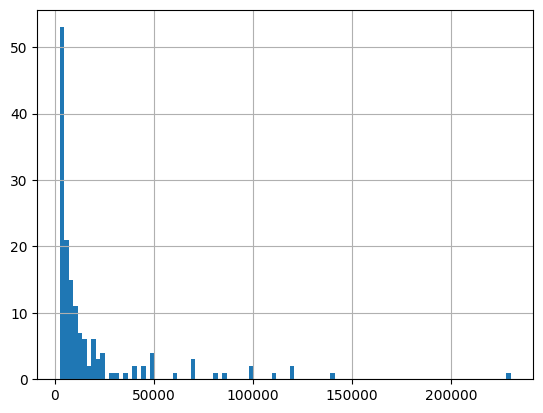

In [5]:
#Histogram of the salaries for players
stats["Salary(2018)"].hist(bins=100)

<Axes: >

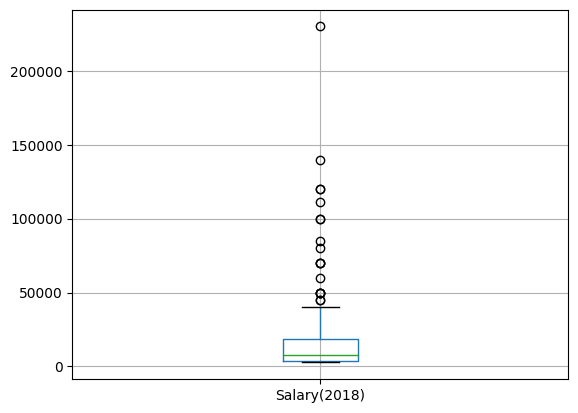

In [6]:
#boxplot of the salary data
stats.boxplot(column=['Salary(2018)'])

In [82]:
pitcher_df = stats[['Wins', 'Losses', 'Saves', 'Hold', 'Blown Saves', 'Games', 'Games Started', 'Innings', 'K/9',
       'BB/9', 'HR/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       'Salary(2018)', 'Salary(2017)']]

In [83]:
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

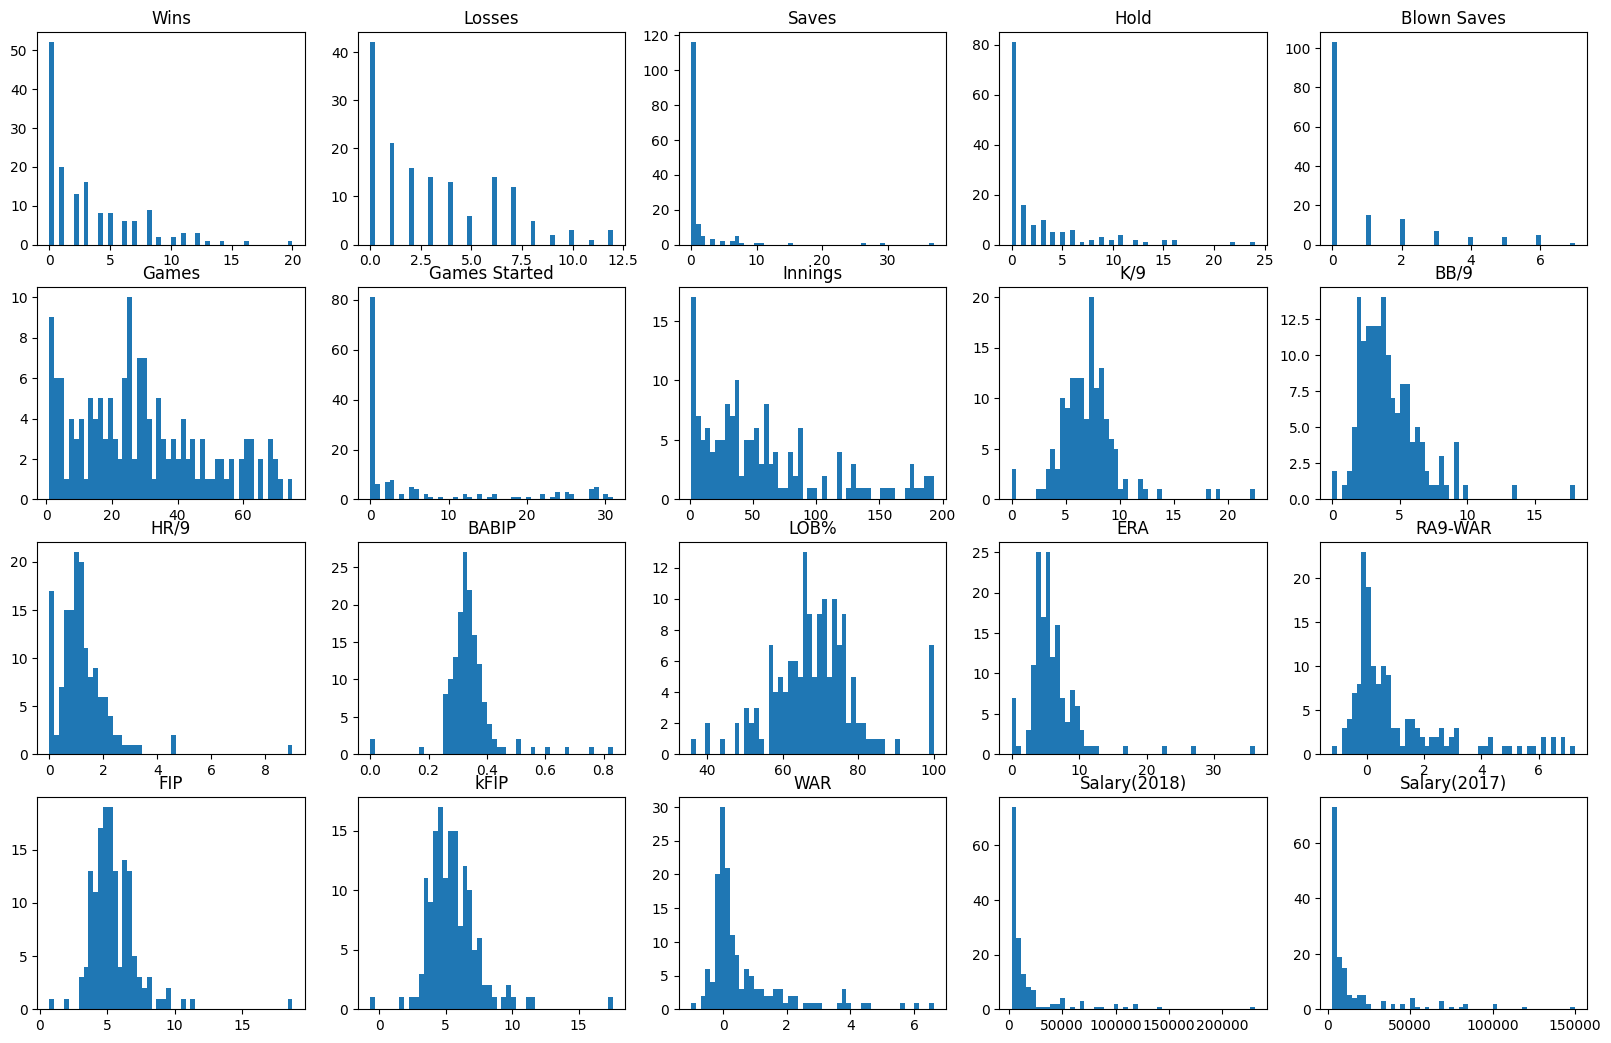

In [9]:
plot_hist_each_column(pitcher_df)

In [84]:
#Stops values from being printed in scientific-notation (prints in float)
pd.options.mode.chained_assignment = None

In [85]:
#function that scales each and every statistics
def standard_scaling(df, scaled):
    for col in scaled:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [86]:
scaled = ['Wins', 'Losses', 'Saves', 'Hold', 'Blown Saves', 'Games', 'Games Started', 'Innings', 'K/9',
       'BB/9', 'HR/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'Salary(2017)']

pitcher_data = standard_scaling(stats,scaled)

In [87]:
pitcher_data = pitcher_data.rename(columns={'Salary(2018)': 'y'})
pitcher_data.head(5)

,Player Name,Team Name,Wins,Losses,Saves,Hold,Blown Saves,Games,Games Started,Innings,...,HR/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,Salary(2017)
0,Merrill Kelly,Wyverns,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,Henry Sosa,Twins,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,Hyun-Jong Yang,Tigers,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,Woo-Chan Cha,Twins,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,Brooks Raley,Giants,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [88]:
#One Hot Encoding of the "Team Name"
team_encoding = pd.get_dummies(pitcher_data['Team Name'])
team_encoding = team_encoding.astype(int)
pitcher_data = pitcher_data.drop('Team Name', axis=1)
pitcher_data = pitcher_data.join(team_encoding)

In [63]:
team_encoding.head(5)

,Bears,Dinos,Eagles,Giants,Lions,Tigers,Twins,Wiz,Wyverns
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0


In [16]:
pitcher_data.head()

,Player Name,Wins,Losses,Saves,Hold,Blown Saves,Games,Games Started,Innings,K/9,...,Salary(2017),Bears,Dinos,Eagles,Giants,Lions,Tigers,Twins,Wiz,Wyverns
0,Merrill Kelly,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,0,0,0,0,1
1,Henry Sosa,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,0,0,0,0,1,0,0
2,Hyun-Jong Yang,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,0,0,0,0,0,1,0,0,0
3,Woo-Chan Cha,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,0,0,0,0,1,0,0
4,Brooks Raley,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,1,0,0,0,0,0


In [89]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting data for training
X = pitcher_data[pitcher_data.columns.difference(['Player Name', 'y'])]
y = pitcher_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [90]:
# Training the linear model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [66]:
# Print the Coefficients
print(lr.coef_)

[ -1481.01733901   7612.15661812   -892.11801281   1271.04500059
   -523.54687556   -416.68736601   3613.84063182 -94136.23649209
  -2434.38947427  -4797.30275904    449.91117164  18144.60099745
   -935.07281796    854.02604585   5396.97279896  -1375.53830289
  -2810.5564514    1301.61974637   3959.10653661  19130.59021357
   -250.69773139  -1560.86205158   -747.04952389  10272.48746451
    236.02530053   1572.00472193    898.37638984  77672.53804469]


In [91]:
pitcher_data.columns

Index(['Player Name', 'Wins', 'Losses', 'Saves', 'Hold', 'Blown Saves',
       'Games', 'Games Started', 'Innings', 'K/9', 'BB/9', 'HR/9', 'BABIP',
       'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y', 'Salary(2017)',
       'Bears', 'Dinos', 'Eagles', 'Giants', 'Lions', 'Tigers', 'Twins', 'Wiz',
       'Wyverns'],
      dtype='object')

In [92]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           7.70e-42
Time:                        11:15:27   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP         -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
BB/9           7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
Bears           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
Blown Saves    1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
Dinos          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
ERA            -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
Eagles         5477.8879   2184.273      2.508      0.014    1140.355    9815.421
FIP           -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
Games         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
Games Started -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
Giants         2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
HR/9           1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
Hold           -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
Innings         854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
K/9            5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
LOB%          -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
Lions          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
Losses         1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
RA9-WAR        3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
Salary(2017)   1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
Saves          -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
Tigers          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
Twins          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
WAR            1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
Wins            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
Wiz            3436.0520   2133.084      1.611      0.111    -799.831    7671.935
Wyverns        2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
kFIP           7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     2.38e+16
================================================================

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'BB/9'),
 Text(3, 0, 'Bears'),
 Text(4, 0, 'Blown Saves'),
 Text(5, 0, 'Dinos'),
 Text(6, 0, 'ERA'),
 Text(7, 0, 'Eagles'),
 Text(8, 0, 'FIP'),
 Text(9, 0, 'Games'),
 Text(10, 0, 'Games Started'),
 Text(11, 0, 'Giants'),
 Text(12, 0, 'HR/9'),
 Text(13, 0, 'Hold'),
 Text(14, 0, 'Innings'),
 Text(15, 0, 'K/9'),
 Text(16, 0, 'LOB%'),
 Text(17, 0, 'Lions'),
 Text(18, 0, 'Losses'),
 Text(19, 0, 'RA9-WAR'),
 Text(20, 0, 'Salary(2017)'),
 Text(21, 0, 'Saves'),
 Text(22, 0, 'Tigers'),
 Text(23, 0, 'Twins'),
 Text(24, 0, 'WAR'),
 Text(25, 0, 'Wins'),
 Text(26, 0, 'Wiz'),
 Text(27, 0, 'Wyverns'),
 Text(28, 0, 'kFIP')]

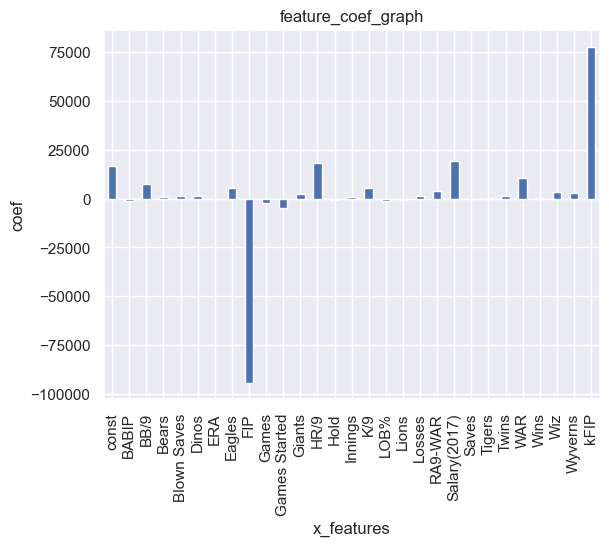

In [93]:
# to list
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

In [94]:
X = pitcher_data[pitcher_data.columns.difference(['Player Name', 'y'])]
y = pitcher_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [95]:
print("Train R Squared:",model.score(X_train, y_train))
print("Test R Squared:",model.score(X_test, y_test))

Train R2: 0.9276949405576705
Test R2: 0.8860171644977815


In [96]:
y_predictions = lr.predict(X_train)
print("Train RMSE:", sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = lr.predict(X_test)
print("Test RMSE:",sqrt(mean_squared_error(y_test, y_predictions)))

Train RMSE: 7282.718684746371
Test RMSE: 14310.696436889153


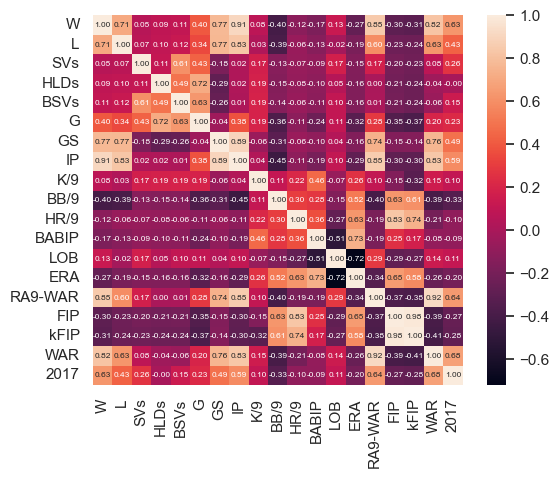

In [97]:
import seaborn as sns

# looking at the correlations between the stats using the heatmap
corr = pitcher_df[scaled].corr(method='pearson')
show_cols = ['W', 'L', 'SVs', 'HLDs', 'BSVs', 'G', 'GS',
             'IP', 'K/9', 'BB/9', 'HR/9', 'BABIP', 'LOB',
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

sns.set(font_scale=1)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 6},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.show()

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#printing the VIF numbers to check which data is suitable for final prediction
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,57.8,BB/9
2,1.2,Bears
3,3.0,Blown Saves
4,1.1,Dinos
5,10.6,ERA
6,1.1,Eagles
7,14238.3,FIP
8,14.6,Games
9,39.6,Games Started


In [100]:
#I have tested with the datas in various ways, and came up with the conclusion of using these datas
#for the best prediction results

#I am retraining the model with these data only.
X = pitcher_data[['FIP', 'WAR', 'BB/9', 'K/9', 'Salary(2017)']]
y = pitcher_data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [104]:
print("New Train R Squared:",model.score(X_train, y_train))
print("New Test R Squared:",model.score(X_test, y_test))

New Train R2: 0.9150591192570362
New Test R2: 0.9038759653889863


In [105]:
y_predictions = lr.predict(X_train)
print("New Train RMSE:", sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = lr.predict(X_test)
print("New Test RMSE:",sqrt(mean_squared_error(y_test, y_predictions)))

New Train RMSE: 7893.462873347693
New Test RMSE: 13141.866063591095
